# Pose推定

## [画像]
https://github.com/tensorboy/pytorch_Realtime_Multi-Person_Pose_Estimation/blob/master/demo/picture_demo.py

In [1]:
import os
import re
import sys
import cv2
import math
import time
import scipy
import argparse
import matplotlib
import numpy as np
import pylab as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from collections import OrderedDict
from scipy.ndimage.filters import gaussian_filter
from network.rtpose_vgg import get_model
from network.post import decode_pose
from training.datasets.coco_data.preprocessing import (inception_preprocess,
                                              rtpose_preprocess,
                                              ssd_preprocess, vgg_preprocess)

In [2]:
from network import im_transform
from evaluate.coco_eval import get_multiplier, get_outputs, handle_paf_and_heat

In [3]:
weight_name = 'pose_model.pth'

In [4]:
model = get_model('vgg19')     
model.load_state_dict(torch.load(weight_name))
model = torch.nn.DataParallel(model).cuda()
model.float()
model.eval()

Bulding VGG19


DataParallel(
  (module): rtpose_model(
    (model0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16): Conv2d(256, 256, kerne

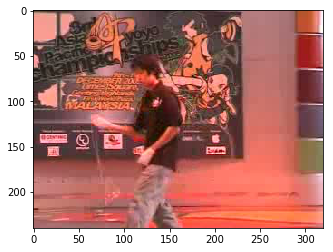

In [5]:
import matplotlib.pyplot as plt

test_image = '/export/data/dataset/UCF-101thm/YoYo/v_YoYo_g09_c02_3.jpg'
#test_image = 'reika&mimin.jpg'
oriImg = cv2.imread(test_image) # B,G,R order
#shape_dst = np.min(oriImg.shape[0:2])
oriImg_show = plt.imread(test_image)
plt.imshow(oriImg_show)

In [6]:
# Get results of original image
multiplier = get_multiplier(oriImg)

In [7]:
with torch.no_grad():
    orig_paf, orig_heat = get_outputs(
        multiplier, oriImg, model,  'rtpose')
          
    # Get results of flipped image
    swapped_img = oriImg[:, ::-1, :]
    flipped_paf, flipped_heat = get_outputs(multiplier, swapped_img,
                                            model, 'rtpose')

    # compute averaged heatmap and paf
    paf, heatmap = handle_paf_and_heat(
orig_heat, flipped_heat, orig_paf, flipped_paf)

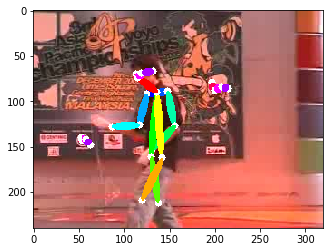

In [8]:
param = {'thre1': 0.1, 'thre2': 0.05, 'thre3': 0.5}
canvas, to_plot, candidate, subset = decode_pose(
    oriImg, param, heatmap, paf)
 
cv2.imwrite('result.png',to_plot)

result = plt.imread('result.png')
plt.imshow(result)

## [動画]
https://github.com/tensorboy/pytorch_Realtime_Multi-Person_Pose_Estimation/blob/master/demo/web_demo.py

In [19]:
import os
import re
import sys
import cv2
import math
import time
import scipy
import argparse
import matplotlib
import numpy as np
import pylab as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from collections import OrderedDict
from config_reader import config_reader
from scipy.ndimage.filters import gaussian_filter
from network.rtpose_vgg import get_model
from network.post import decode_pose
from training.datasets.coco_data.preprocessing import (inception_preprocess,
                                              rtpose_preprocess,
ssd_preprocess, vgg_preprocess)

ModuleNotFoundError: No module named 'config_reader'